![](data/venn_ml.png)

![](data/ext_sklearn.jpeg)

![](data/sklearn.png)

# WorkFlow

+ Obtener datos
+ Definir objetivo
+ Limpieza de datos (unidades, outliers, one-hot, etc..)
+ Definir modelo (regresión, clasificación, ...)
+ Entrenar (hiperparámetros, validación, ...) (**)
+ Predecir (testear)
+ Evaluar
+ Si hay mucho error volver a (**)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# obtener datos

census=pd.read_csv('data/census.csv')

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3220 non-null int64
State              3220 non-null object
County             3220 non-null object
TotalPop           3220 non-null int64
Men                3220 non-null int64
Women              3220 non-null int64
Hispanic           3220 non-null float64
White              3220 non-null float64
Black              3220 non-null float64
Native             3220 non-null float64
Asian              3220 non-null float64
Pacific            3220 non-null float64
Citizen            3220 non-null int64
Income             3219 non-null float64
IncomeErr          3219 non-null float64
IncomePerCap       3220 non-null int64
IncomePerCapErr    3220 non-null int64
Poverty            3220 non-null float64
ChildPoverty       3219 non-null float64
Professional       3220 non-null float64
Service            3220 non-null float64
Office             3220 non-null float64
Constru

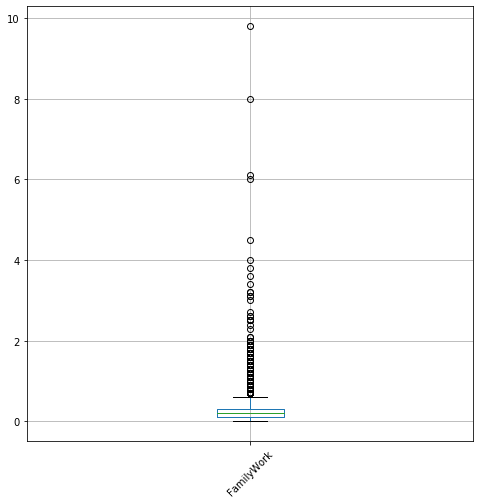

In [5]:
# outliers (3*IQR)

plt.figure(figsize=(8, 8))
census.boxplot(column=['FamilyWork'])
plt.xticks(rotation=45)
plt.show();

In [6]:
import numpy as np

q1=np.percentile(census.FamilyWork, 25)
q3=np.percentile(census.FamilyWork, 75)

In [7]:
iqr=q3-q1

upper=q3+3*iqr
lower=q1-3*iqr

In [8]:
len(census[census.FamilyWork < lower])

0

In [9]:
census_clean=census[census.FamilyWork < upper]
census_clean.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


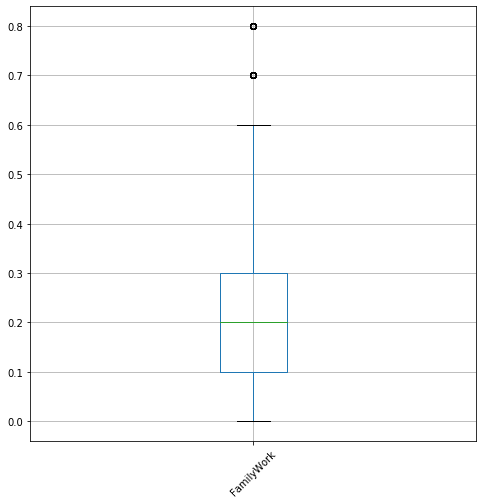

In [77]:
plt.figure(figsize=(8, 8))
census_clean.boxplot(column=['FamilyWork'])
plt.xticks(rotation=45)
plt.show();

In [11]:
print (census_clean.shape, census.shape)

(3022, 37) (3220, 37)


In [12]:
# reescalado [0, 1]

import warnings
warnings.simplefilter('ignore')


def escala(x):
    return (x/100).round(3)

In [13]:
conversion=['Hispanic','White', 'Black', 'Native',
            'Asian', 'Pacific', 'Poverty', 'ChildPoverty',
            'Service', 'Office']

In [14]:
n_columnas=[x+'Rate' for x in conversion]

census[n_columnas]=census[conversion].apply(escala)

census.NativeRate.head()

0    0.004
1    0.006
2    0.002
3    0.004
4    0.003
Name: NativeRate, dtype: float64

In [15]:
census.Native.head()

0    0.4
1    0.6
2    0.2
3    0.4
4    0.3
Name: Native, dtype: float64

In [16]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239


In [17]:
# normalizacion

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [18]:
census['TotalPopScaled']=MinMaxScaler().fit_transform(census.TotalPop.values.reshape(-1, 1))

In [19]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,TotalPopScaled
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242,0.005493
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271,0.019429
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231,0.002674
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178,0.002243
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239,0.005741


In [20]:
# one-hot, dummies

state=pd.get_dummies(census.State, drop_first=True)
census=pd.concat([census, state], axis=1)
census.tail()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3219,72153,Puerto Rico,Yauco,39474,19047,20427,99.5,0.5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# shuffling/sampling

census.sample(frac=.1).head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3090,55085,Wisconsin,Oneida,35653,17968,17685,1.4,95.4,0.6,1.0,...,0,0,0,0,0,0,0,0,1,0
1548,29131,Missouri,Miller,24956,12272,12684,1.7,95.2,0.4,1.0,...,0,0,0,0,0,0,0,0,0,0
3133,56029,Wyoming,Park,28985,14230,14755,5.8,90.5,0.8,0.5,...,0,0,0,0,0,0,0,0,0,1
1088,21191,Kentucky,Pendleton,14514,7237,7277,1.1,97.1,0.6,0.1,...,0,0,0,0,0,0,0,0,0,0
2781,49009,Utah,Daggett,776,422,354,2.3,95.7,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
census.sample(n=200).head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2317,45003,South Carolina,Aiken,163908,79318,84590,5.3,67.2,24.6,0.2,...,0,0,0,0,0,0,0,0,0,0
1416,28031,Mississippi,Covington,19471,9341,10130,2.1,61.3,35.3,0.1,...,0,0,0,0,0,0,0,0,0,0
1266,26071,Michigan,Iron,11507,5687,5820,1.7,95.4,0.4,0.7,...,0,0,0,0,0,0,0,0,0,0
560,16019,Idaho,Bonneville,107788,53404,54384,12.4,84.1,0.4,0.4,...,0,0,0,0,0,0,0,0,0,0
668,17147,Illinois,Piatt,16495,8171,8324,1.1,96.8,0.4,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
census.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ChildPovertyRate', 'ServiceRate', 'OfficeRate',
       'TotalPopScaled', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mis

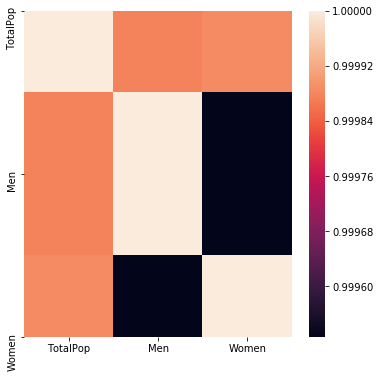

In [24]:
# colinealidad

import seaborn as sns

plt.figure(figsize=(6,6))

sns.heatmap(census[['TotalPop', 'Men', 'Women']].corr());

In [25]:
# train_test_split

from sklearn.model_selection import train_test_split as tts

In [26]:
#split 80-20

train, test = tts(census, test_size=0.2, train_size=0.8, random_state=42)

In [27]:
train.shape

(2576, 99)

In [28]:
test.shape

(644, 99)

In [29]:
census=census.dropna()

In [30]:
X = census.drop(columns=['TotalPop'])._get_numeric_data() # datos

y = census.TotalPop   # objetivo 

In [31]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(2574, 96)

In [33]:
X_test.shape

(644, 96)

In [34]:
y_train.shape

(2574,)

In [35]:
y_test.shape

(644,)

In [36]:
# modelo

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score

In [37]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred=linreg.predict(X_test)

In [39]:
y_pred.shape

(644,)

In [40]:
y_test.shape==y_pred.shape

True

In [41]:
r2_score(y_pred, y_test)

1.0

In [42]:
# sin Men Women


X = census.drop(columns=['TotalPop', 'Men', 'Women'])._get_numeric_data() # datos

y = census.TotalPop   # objetivo

In [43]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=9)

In [44]:
linreg=LinReg()
linreg.fit(X_train, y_train)


y_pred=linreg.predict(X_test)


r2_score(y_pred, y_test)

1.0

In [45]:
linreg.score(X_test, y_test)

1.0

In [46]:
linreg.coef_[:10]

array([-1.10142780e-10, -1.36781856e-07, -7.40492626e-09, -1.63771046e-08,
       -1.34611362e-08,  2.67267097e-09,  1.48697566e-07, -4.77484718e-12,
        1.70530257e-13,  1.59161573e-12])

In [47]:
linreg.intercept_

85.00000577046012

# Feature Extraction and Engineering

In [48]:
import zipfile

In [49]:
zf=zipfile.ZipFile('data/mahindra.zip')

ctr=pd.read_csv(zf.open('test.csv'), nrows=1e5)

ctr.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [50]:
ctr.shape

(100000, 23)

In [51]:
# optimizacion de memoria

ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
reservation_id              100000 non-null object
booking_date                100000 non-null object
checkin_date                100000 non-null object
checkout_date               100000 non-null object
channel_code                100000 non-null int64
main_product_code           100000 non-null int64
numberofadults              100000 non-null int64
numberofchildren            100000 non-null int64
persontravellingid          100000 non-null int64
resort_region_code          100000 non-null int64
resort_type_code            100000 non-null int64
room_type_booked_code       100000 non-null int64
roomnights                  100000 non-null int64
season_holidayed_code       99975 non-null float64
state_code_residence        98638 non-null float64
state_code_resort           100000 non-null int64
total_pax                   100000 non-null int64
member_age_buckets          100000

In [52]:
for e in ctr.select_dtypes('object').columns:
    ctr[e]=ctr[e].astype('category')
ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
reservation_id              100000 non-null category
booking_date                100000 non-null category
checkin_date                100000 non-null category
checkout_date               100000 non-null category
channel_code                100000 non-null int64
main_product_code           100000 non-null int64
numberofadults              100000 non-null int64
numberofchildren            100000 non-null int64
persontravellingid          100000 non-null int64
resort_region_code          100000 non-null int64
resort_type_code            100000 non-null int64
room_type_booked_code       100000 non-null int64
roomnights                  100000 non-null int64
season_holidayed_code       99975 non-null float64
state_code_residence        98638 non-null float64
state_code_resort           100000 non-null int64
total_pax                   100000 non-null int64
member_age_buckets        

In [53]:
for e in ctr.select_dtypes('integer').columns:
    ctr[e]=pd.to_numeric(ctr[e], downcast='integer')
ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
reservation_id              100000 non-null category
booking_date                100000 non-null category
checkin_date                100000 non-null category
checkout_date               100000 non-null category
channel_code                100000 non-null int8
main_product_code           100000 non-null int8
numberofadults              100000 non-null int8
numberofchildren            100000 non-null int8
persontravellingid          100000 non-null int16
resort_region_code          100000 non-null int8
resort_type_code            100000 non-null int8
room_type_booked_code       100000 non-null int8
roomnights                  100000 non-null int8
season_holidayed_code       99975 non-null float64
state_code_residence        98638 non-null float64
state_code_resort           100000 non-null int8
total_pax                   100000 non-null int8
member_age_buckets          100000 n

In [54]:
for e in ctr.select_dtypes('float').columns:
    ctr[e]=pd.to_numeric(ctr[e], downcast='float')
ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
reservation_id              100000 non-null category
booking_date                100000 non-null category
checkin_date                100000 non-null category
checkout_date               100000 non-null category
channel_code                100000 non-null int8
main_product_code           100000 non-null int8
numberofadults              100000 non-null int8
numberofchildren            100000 non-null int8
persontravellingid          100000 non-null int16
resort_region_code          100000 non-null int8
resort_type_code            100000 non-null int8
room_type_booked_code       100000 non-null int8
roomnights                  100000 non-null int8
season_holidayed_code       99975 non-null float32
state_code_residence        98638 non-null float32
state_code_resort           100000 non-null int8
total_pax                   100000 non-null int8
member_age_buckets          100000 n

In [55]:
ctr.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


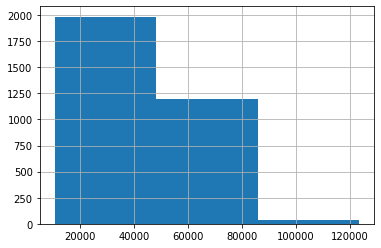

In [56]:
# Binning

census['Income'].hist(bins=3);

In [57]:
pd.cut(census.Income, 3).value_counts()

(10386.046, 48150.333]    1984
(48150.333, 85801.667]    1193
(85801.667, 123453.0]       41
Name: Income, dtype: int64

In [58]:
pd.qcut(census.Income, [0, 1/3, 2/3, 1]).value_counts()

(10498.999, 40630.0]     1074
(49734.667, 123453.0]    1073
(40630.0, 49734.667]     1071
Name: Income, dtype: int64

In [59]:
# Nuevas Caracteristicas

census['HULI']=np.where((census.Unemployment>0.07)&(pd.qcut(census.Income, [0, 1/3, 2/3, 1]).cat.codes==0), 1, 0)

In [78]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,HULI
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0,0,0,0,0,0,0,0,0,0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0,0,0,0,0,0,0,0,0,0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0,0,0,0,0,0,0,0,0,1
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0,0,0,0,0,0,0,0,0,1
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Reduccion de dimensiones

# Ya vimos PCA, UMAP..

census.corr().head()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,HULI
CensusId,1.000000,-0.061933,-0.062468,-0.061404,0.343693,-0.164625,-0.157078,-0.022415,-0.106650,-0.067761,...,0.168118,0.302351,0.103242,0.075563,0.253282,0.147181,0.183450,0.219899,0.128287,0.019812
TotalPop,-0.061933,1.000000,0.999877,0.999886,0.114004,-0.187826,0.075189,-0.045932,0.452655,0.059282,...,-0.016960,0.004962,0.000193,-0.011325,-0.024311,0.027623,-0.027174,-0.009342,-0.019732,-0.149683
Men,-0.062468,0.999877,1.000000,0.999527,0.114408,-0.186933,0.072700,-0.045711,0.453879,0.061245,...,-0.017344,0.005840,0.000846,-0.011342,-0.024372,0.028628,-0.027194,-0.009002,-0.019534,-0.150248
Women,-0.061404,0.999886,0.999527,1.000000,0.113588,-0.188642,0.077570,-0.046134,0.451372,0.057377,...,-0.016587,0.004114,-0.000437,-0.011307,-0.024247,0.026649,-0.027149,-0.009666,-0.019918,-0.149104
Hispanic,0.343693,0.114004,0.114408,0.113588,1.000000,-0.725294,-0.144421,-0.056771,0.045620,0.004256,...,-0.070526,0.345324,-0.011379,-0.032366,-0.066408,0.014860,-0.067833,-0.059272,-0.012087,0.149336


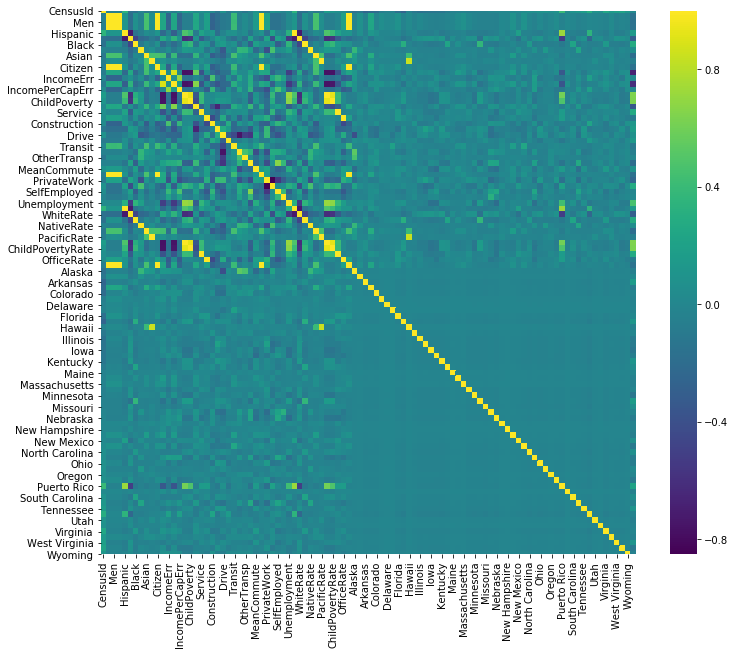

In [95]:
# colinealidad

plt.figure(figsize=(12, 10))

sns.heatmap(census.corr(), cmap='viridis');

In [81]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.tree import DecisionTreeRegressor as DTR

In [82]:
features=['Poverty', 'WorkAtHome', 'SelfEmployed', 'Black', 
          'Native', 'Asian', 'Pacific', 'Hispanic', 'IncomePerCap']

target='Unemployment'

In [83]:
X_train, X_test, y_train, y_test = tts(census[features], census[target])

In [84]:
modelo=LinReg()

In [85]:
modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
# recursive feature elimination

selector=RFE(modelo, n_features_to_select=4, step=1)

In [87]:
# entrenar a traves del RFE

selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=4, step=1, verbose=0)

In [88]:
selector.ranking_

array([1, 4, 1, 2, 1, 5, 1, 3, 6])

In [89]:
print ([features[i] for i,e in enumerate(selector.support_) if e])

['Poverty', 'SelfEmployed', 'Native', 'Pacific']


In [90]:
from sklearn.feature_selection import SelectFromModel as SFM

modelo=DTR()

selector=SFM(modelo, threshold=0.25)
selector.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                                max_features=None,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                presort=False,
                                                random_state=None,
                                                splitter='best'),
                max_features=None, norm_order=1, prefit=False, threshold=0.25)

In [91]:
selector.transform(X_test).shape

(805, 1)

In [92]:
modelo.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [93]:
modelo.feature_importances_

array([0.46272937, 0.07207951, 0.08442334, 0.07788592, 0.03505658,
       0.04297071, 0.01632577, 0.04400433, 0.16452446])

In [94]:
sum(modelo.feature_importances_)

1.0